In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

# TSR

In [2]:
exp_data = np.load('new_1_lamp_left_on.npy')

In [3]:
print('In this data example, the number of frames is %d, and the number of pixels is %d.' % (exp_data.shape[0], exp_data.shape[1]))


In this data example, the number of frames is 1443, and the number of pixels is 307200.


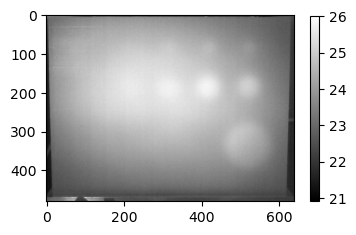

In [4]:
frame = exp_data[1300, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(frame, cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

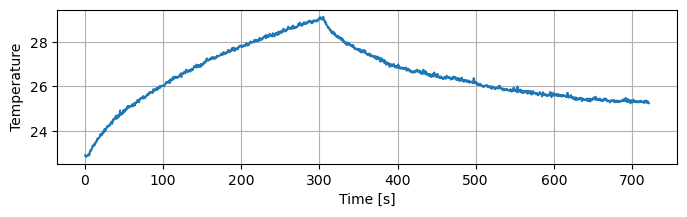

In [5]:
#center at 153920
p_temp = exp_data[:,153920] # Select the center point of the plate surface
t = np.linspace(0.5, 1443*0.5, 1443) # The data was extracted at a frequency of 2Hz. Thus, for 1324 frames, the duration of this experiment is 1324*0.5s

plt.figure(figsize=(8,2))
plt.plot(t, p_temp)
plt.xlabel('Time [s]')
plt.ylabel('Temperature')
plt.grid('on')
plt.show()

In [6]:
filtered_data=gaussian_filter(exp_data,2)

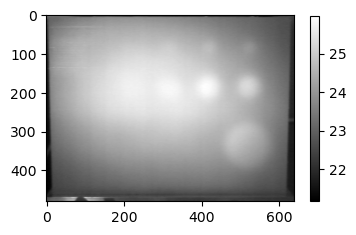

In [7]:
filtered_frame = filtered_data[1200, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(filtered_frame, cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

In [8]:
kernel = np.ones((5, 5)) / 25
smooth_data = convolve2d(filtered_data, kernel, mode="same")

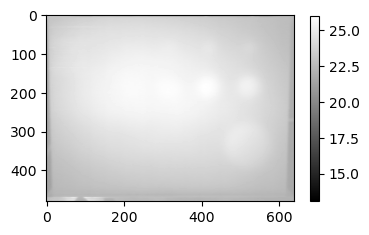

In [9]:
smooth_frame = smooth_data[1200, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(smooth_frame, cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

In [10]:
log_normalized_data=np.log(filtered_data)
log_t=np.log(t)

In [11]:
first=[]
second=[]

for i in range(exp_data.shape[1]):
    coeffs = np.polyfit(t, log_normalized_data[:,i], 4)
    poly_fit = np.poly1d(coeffs)
    log_temp_fitted = poly_fit(t)
    first_derivative = np.gradient(log_temp_fitted, t)
    second_derivative = np.gradient(first_derivative, t)
    first.append(first_derivative)
    second.append(second_derivative)
    

In [12]:
arr=np.array(first)
first_dev=arr.T
arr2=np.array(second)
second_dev=arr2.T

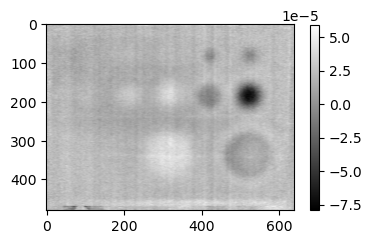

In [13]:
log_frame = first_dev[1300, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(log_frame, cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

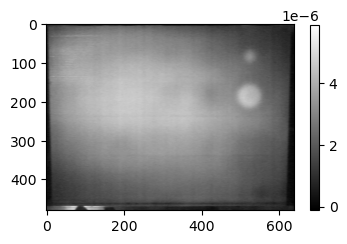

In [14]:
log2_frame = second_dev[1300, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(log2_frame, cmap='gray')
plt.colorbar(shrink=0.8)
plt.show()

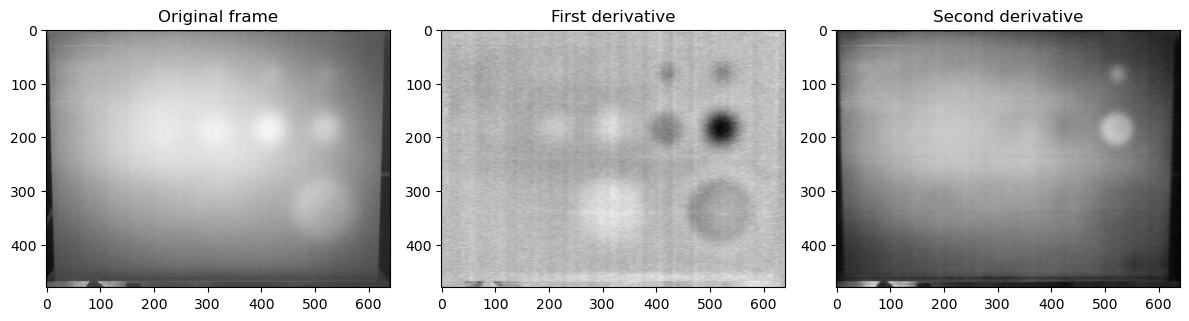

In [15]:
plt.figure(figsize=(12, 9))

plt.subplot(1, 3, 1)  
plt.imshow(frame, cmap='gray')
plt.title("Original frame")

plt.subplot(1, 3, 2)
plt.imshow(log_frame, cmap='gray')
plt.title("First derivative")

plt.subplot(1, 3, 3)
plt.imshow(log2_frame, cmap='gray')
plt.title("Second derivative")

plt.tight_layout()
plt.show()

# Frequency domain analysis

In [16]:
from scipy.fftpack import fft, fftfreq

In [17]:
p_temp = exp_data[:,155000] # Select the center point of the plate surface
centered_p_temp=p_temp-np.mean(p_temp)
t = np.linspace(0.5, 1443*0.5, 1443) # The data was extracted at a frequency of 2Hz. Thus, for 1324 frames, the duration of this experiment is 1324*0.5s


1443


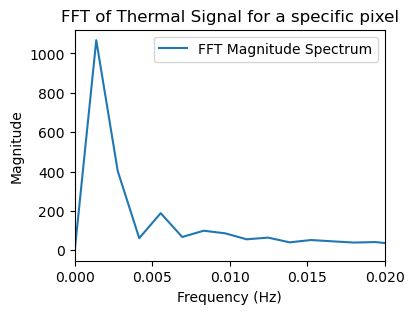

In [38]:
fft_p_temp=fft(centered_p_temp) 
freq=fftfreq(len(t),d=0.5)
print(len(freq))

plt.figure(figsize=(4, 3))
plt.plot(np.abs(freq[:700]), np.abs(fft_p_temp[:700]), label="FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Thermal Signal for a specific pixel")
plt.xlim(0,0.02)
plt.legend()
plt.show()

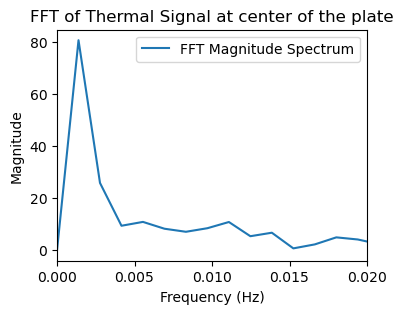

In [42]:
p2 = exp_data[:,153600] # Select the center point of the plate surface
centered_p2=p2-np.mean(p2)
fft_p2=fft(centered_p2) 

plt.figure(figsize=(4, 3))
plt.plot(np.abs(freq[:700]), np.abs(fft_p2[:700]), label="FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Thermal Signal at center of the plate")
plt.xlim(0,0.02)
plt.legend()
plt.show()
